In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_this(data, cost=None, rarity=None):
    """
    Plots the average attack and health of minions by year, filtered by cost and/or rarity.

    Parameters:
    data (DataFrame): The input DataFrame containing minion data. It must include 'cost', 'attack', 'health', 'set', and 'rarity' columns.
    cost (int, optional): The cost of the minions to filter the data (default is None, meaning no filtering by cost).
    rarity (str, optional): The rarity of the minions to filter the data (default is None, meaning no filtering by rarity).

    This function filters the data based on the specified cost and/or rarity, calculates the average attack 
    and health for each year (set), and creates a line plot to visualize these averages. 
    The plot includes:
    - A yellow line for average attack values, marked with downward-pointing triangles.
    - A red line for average health values, marked with diamonds.
    The plot also includes labels for the axes, a title, a legend, and grid lines for better readability.
    
    Usage:
    plot_this(data, cost=1)           # Example usage for 1-cost minions
    plot_this(data, rarity='Legendary')  # Example usage for Legendary minions
    plot_this(data, cost=3, rarity='Epic') # Example usage for 3-cost Epic minions
    """
    
    if cost is not None:
        data = data[data['cost'] == cost]    
    if rarity is not None:
        data = data[data['rarity'] == rarity]
        
    avg_stats = data.groupby('set')[['attack', 'health']].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    plt.plot(avg_stats['set'], avg_stats['attack'], label='Average Attack', color='yellow', marker='v')
    plt.plot(avg_stats['set'], avg_stats['health'], label='Average Health', color='red', marker='D')
    plt.xlabel('Year')
    plt.ylabel('Average Value')
    title = f'Average Attack and Health of Minions by Year'
    
    if cost is not None:
        title += f' (Cost {cost})'
    if rarity is not None:
        title += f' ({rarity})'
        
    plt.title(title)    
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.show()

In [3]:
def plot_that(data, cost):
    """
    Plots the average efficiency of minions by rarity over time for a given cost.

    Parameters:
    data (DataFrame): The input DataFrame containing minion data, including 'cost', 'attack', 'health', 'rarity', 'set', and 'efficiency'.
    cost (int): The cost of minions to filter the data for comparison.

    This function filters the data based on the provided cost, groups it by 'set' and 'rarity', calculates the average efficiency, 
    and plots the results with lines for common, rare, epic, and legendary minions over time. Each rarity has its own color.
    """
    
    filtered_data = data[data['cost'] == cost]
    avg_efficiency = filtered_data.groupby(['set', 'rarity'])['efficiency'].mean().unstack()
    plt.figure(figsize=(10, 6))
    plt.plot(avg_efficiency.index, avg_efficiency['common'], label='Common', color='grey', marker='o')
    plt.plot(avg_efficiency.index, avg_efficiency['rare'], label='Rare', color='blue', marker='o')
    plt.plot(avg_efficiency.index, avg_efficiency['epic'], label='Epic', color='purple', marker='o')
    plt.plot(avg_efficiency.index, avg_efficiency['legendary'], label='Legendary', color='orange', marker='o')
    plt.xlabel('Year')
    plt.ylabel('Average Efficiency')
    plt.title(f'Average Efficiency per Rarity Over Time (Cost {cost})')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

In [4]:
def find_card(cards, key, value):
    """Find a card by a specific key-value pair.

    Args:
        cards (list): A list of card dictionaries.
        key (str): The key to search for (e.g., 'name', 'cost').
        value: The value to match.

    Returns:
        list: A list of matching card dictionaries.
    """
    matching_cards = [card for card in cards if card.get(key) == value]
    return matching_cards

In [5]:
url = 'https://api.hearthstonejson.com/v1/208591/enUS/cards.collectible.json'

In [6]:
response = requests.get(url)
response.status_code

200

In [7]:
cards = response.json()
len(cards)

6653

In [8]:
raw = pd.DataFrame(cards)

In [9]:
draft = raw.loc[raw['type']=='MINION']
draft['type'].value_counts()

type
MINION    3974
Name: count, dtype: int64

In [10]:
clean_sets = {
    'HERO_SKINS': 'Hero Skins',
     'PLACEHOLDER_202204': 'Unknown',
     'VANILLA': 'Vanilla',
     'CORE': 'Core',
 'EXPERT1': 'Classic',
 'LEGACY': 'Legacy',
 'RETURN_OF_THE_LICH_KING': 'March of the Lich King',
 'BATTLE_OF_THE_BANDS': 'Festival of Legends',
 'WHIZBANGS_WORKSHOP': "Whizbang's Workshop",
 'ISLAND_VACATION': "Perils in Paradise",
 'TITANS': "TITANS",
 'WILD_WEST': "Showdown in the Badlands",
 'REVENDRETH': "Murder at Castle Nathria",
 'THE_SUNKEN_CITY': "Voyage to the Sunken City",
 'ALTERAC_VALLEY': "Fractured in Alterac Valley",
 'DARKMOON_FAIRE': "Madness at the Darkmoon Faire",
 'STORMWIND': "United in Stormwind",
 'THE_BARRENS': "Forged in the Barrens",
 'WONDERS': "Wonders",
 'DRAGONS': "Descent of Dragons",
 'DALARAN': "Rise of Shadows",
 'BOOMSDAY': "The Boomsday Project",
 'UNGORO': "Journey to Un'Goro",
 'ULDUM': "Saviors of Uldum",
 'TROLL': "Rastakhan's Rumble",
 'BLACK_TEMPLE': "Ashes of Outland",
 'ICECROWN': "Knights of the Frozen Throne",
 'SCHOLOMANCE': "Scholomance Academy",
 'LOOTAPALOOZA': "Kobolds & Catacombs",
 'GILNEAS': "The Witchwood",
 'OG': "Whispers of the Old Gods",
 'TGT': "The Grand Tournament",
 'GANGS': "Mean Streets of Gadgetzan",
 'GVG': "Goblins vs Gnomes",
 'LOE': "League of Explorers",
 'KARA': "One Night in Karazhan",
 'YEAR_OF_THE_DRAGON': "Galakrond's Awakening",
 'BRM': "Blackrock Mountain",
 'NAXX': "Curse of Naxxramas",
 'PATH_OF_ARTHAS': "Path of Arthas",
 'DEMON_HUNTER_INITIATE': "Demon Hunter Initiate",
 'EVENT': "Event",
 'SPACE': "The Great Dark Beyond"
}

In [11]:
draft['set'].replace(clean_sets, inplace=True)

In [25]:
draft = draft.loc[draft['set'].isin([
    "Vanilla",
    "Classic",
    "Legacy",
    "Curse of Naxxramas",
    "Goblins vs Gnomes",
    "Blackrock Mountain",
    "The Grand Tournament",
    "League of Explorers",
    "Whispers of the Old Gods",
    "One Night in Karazhan",
    "Mean Streets of Gadgetzan",
    "Journey to Un'Goro",
    "Knights of the Frozen Throne",
    "Kobolds & Catacombs",
    "The Witchwood",
    "The Boomsday Project",
    "Rastakhan's Rumble",
    "Rise of Shadows",
    "Saviors of Uldum",
    "Descent of Dragons",
    "Galakrond's Awakening",
    "Ashes of Outland",
    "Scholomance Academy",
    "Madness at the Darkmoon Faire",
    "Forged in the Barrens",
    "United in Stormwind",
    "Fractured in Alterac Valley",
    "Voyage to the Sunken City",
    "Murder at Castle Nathria",
    "March of the Lich King",
    "Festival of Legends",
    "TITANS",
    "Showdown in the Badlands", 
    "Whizbang's Workshop",
    "Perils in Paradise"
])]

In [26]:
data = draft[['name', 'rarity', 'cost', 'attack', 'health', 'text', 'mechanics', 'set']]

In [11]:
classic = data.loc[data['set'] == "Classic"]
y2014 = data.loc[data['set'].isin(["Curse of Naxxramas", "Goblins vs Gnomes"])]
y2015 = data.loc[data['set'].isin(["Blackrock Mountain", "The Grand Tournament", "League of Explorers"])]
y2016 = data.loc[data['set'].isin(["Whispers of the Old Gods", "Mean Streets of Gadgetzan", "One Night in Karazhan"])]
y2017 = data.loc[data['set'].isin(["Kobolds & Catacombs", "Journey to Un'Goro", "Knights of the Frozen Throne"])]
y2018 = data.loc[data['set'].isin(["The Witchwood", "The Boomsday Project", "Rastakhan's Rumble"])]
y2019 = data.loc[data['set'].isin(["Rise of Shadows", "Saviors of Uldum", "Descent of Dragons", "Galakrond's Awakening"])]
y2020 = data.loc[data['set'].isin(["Ashes of Outland", "Madness at the Darkmoon Faire", "Scholomance Academy"])]
y2021 = data.loc[data['set'].isin(["United in Stormwind", "Fractured in Alterac Valley", "Forged in the Barrens"])]
y2022 = data.loc[data['set'].isin(["Voyage to the Sunken City", "Murder at Castle Nathria", "March of the Lich King"])]
y2023 = data.loc[data['set'].isin(["Festival of Legends", "TITANS", "Showdown in the Badlands"])]
y2024 = data.loc[data['set'].isin(["Whizbang's Workshop", "Perils in Paradise", "The Great Dark Beyond"])]

In [17]:
cost0 = data.loc[data['cost']==0]
cost1 = data.loc[data['cost']==1]
cost2 = data.loc[data['cost']==2]
cost3 = data.loc[data['cost']==3]
cost4 = data.loc[data['cost']==4]
cost5 = data.loc[data['cost']==5]
cost6 = data.loc[data['cost']==6]
cost7 = data.loc[data['cost']==7]
cost8 = data.loc[data['cost']==8]
cost9 = data.loc[data['cost']==9]
cost10 = data.loc[data['cost']==10]
costxl = data.loc[data['cost'] > 10]

In [71]:
common = data.loc[data['rarity']=='COMMON']
rare = data.loc[data['rarity']=='RARE']
epic = data.loc[data['rarity']=='EPIC']
legendary = data.loc[data['rarity']=='LEGENDARY']

In [27]:
clean_year = {
    "Legacy" : 2014,
    "Vanilla" : 2014,
    "Classic" : 2014,
    "Curse of Naxxramas": 2014,
    "Goblins vs Gnomes": 2014,
    "Blackrock Mountain": 2015,
    "The Grand Tournament": 2015,
    "League of Explorers": 2015,
    "Whispers of the Old Gods": 2016,
    "Mean Streets of Gadgetzan": 2016,
    "One Night in Karazhan": 2016,
    "Kobolds & Catacombs": 2017,
    "Journey to Un'Goro": 2017,
    "Knights of the Frozen Throne": 2017,
    "The Witchwood": 2018,
    "The Boomsday Project": 2018,
    "Rastakhan's Rumble": 2018,
    "Rise of Shadows": 2019,
    "Saviors of Uldum": 2019,
    "Descent of Dragons": 2019,
    "Galakrond's Awakening": 2019,
    "Ashes of Outland": 2020,
    "Madness at the Darkmoon Faire": 2020,
    "Scholomance Academy": 2020,
    "United in Stormwind": 2021,
    "Fractured in Alterac Valley": 2021,
    "Forged in the Barrens": 2021,
    "Voyage to the Sunken City": 2022,
    "Murder at Castle Nathria": 2022,
    "March of the Lich King": 2022,
    "Festival of Legends": 2023,
    "TITANS": 2023,
    "Showdown in the Badlands": 2023,
    "Whizbang's Workshop": 2024,
    "Perils in Paradise": 2024,
    "The Great Dark Beyond": 2024
}

data['set'].replace(clean_year, inplace=True)

In [28]:
data['rarity'] = data['rarity'].apply(lambda rarity: rarity.lower())

In [29]:
# We need to understand how efficiently the mana is being spent, stats-wise.
data['efficiency'] = (data['attack'] + data['health']) / data['cost']
data['efficiency'] = data['efficiency'].round(2)
data = data[data['cost'] != 0] # We need to drop out some minions with mana cost zero because they were returning "infinite" as efficiency

In [30]:
data['efficiency'].describe()

count    3341.000000
mean        1.995678
std         0.704257
min         0.200000
25%         1.600000
50%         2.000000
75%         2.250000
max        10.000000
Name: efficiency, dtype: float64

In [31]:
vanillas = data.loc[data['text'].isna()]
vanillas['efficiency'].describe()

count    39.000000
mean      2.495641
std       0.678985
min       2.000000
25%       2.000000
50%       2.250000
75%       2.500000
max       5.000000
Name: efficiency, dtype: float64

In [32]:
drawers = data.loc[data['text'].str.contains('draw', case=False, na=False)]
drawers['efficiency'].describe()

count    299.000000
mean       1.940803
std        0.724227
min        0.600000
25%        1.500000
50%        2.000000
75%        2.000000
max       10.000000
Name: efficiency, dtype: float64

In [33]:
drawers

,name,rarity,cost,attack,health,text,mechanics,set,efficiency
13,Shadowfiend,epic,2.0,2.0,3.0,"Whenever you draw a card, reduce its Cost by (1).",[TRIGGER_VISUAL],2015,2.50
26,Wilfred Fizzlebang,legendary,6.0,4.0,4.0,Cards you draw from your Hero Power cost (0).,[TRIGGER_VISUAL],2015,1.33
57,King's Elekk,common,2.0,3.0,2.0,<b>Battlecry:</b> Reveal a minion in each deck...,[BATTLECRY],2015,2.50
72,Varian Wrynn,legendary,10.0,7.0,7.0,<b>Battlecry:</b> Draw 3 cards.\nPut any minio...,[BATTLECRY],2015,1.40
128,Sea Reaver,epic,6.0,6.0,7.0,"When you draw this, deal 1 damage to your mini...",NaN,2015,2.17
...,...,...,...,...,...,...,...,...,...
6584,Mindbender,common,4.0,4.0,4.0,<b>Battlecry:</b> Deal 1 damage for each card ...,[BATTLECRY],2023,2.00
6597,Alarmed Securitybot,rare,4.0,4.0,3.0,[x]<b>Deathrattle:</b> Draw another\nminion. S...,[DEATHRATTLE],2023,1.75
6605,Meddlesome Servant,rare,3.0,3.0,4.0,<b>Battlecry:</b> If you've cast\n5 or more sp...,[BATTLECRY],2023,2.33
6620,Luckysoul Hoarder,rare,3.0,3.0,4.0,[x]<b>Battlecry:</b> Shuffle 2 Soul\nFragments...,"[BATTLECRY, CORRUPT]",2020,2.33


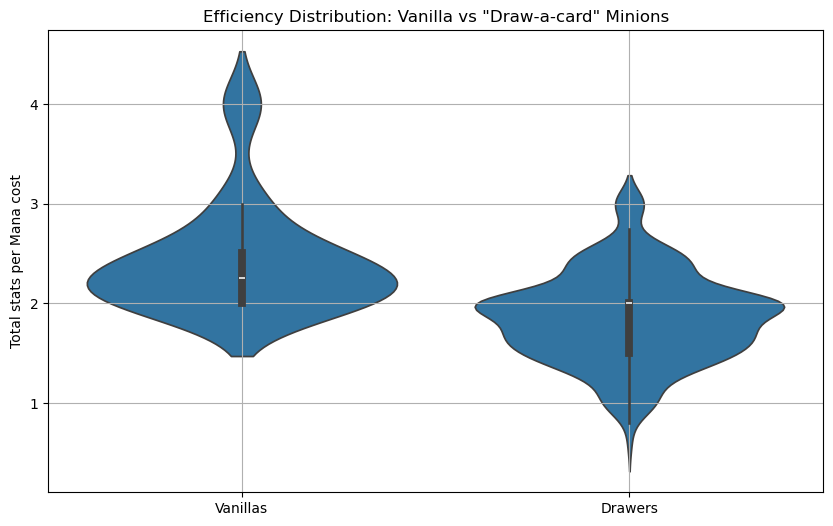

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your dataframes: vanillas and drawers

# Set a threshold for filtering out outliers
threshold_vanilla = vanillas['efficiency'].quantile(0.95)
threshold_drawer = drawers['efficiency'].quantile(0.95)

# Filter the dataframes to exclude outliers
vanillas_filtered = vanillas[vanillas['efficiency'] <= threshold_vanilla]
drawers_filtered = drawers[drawers['efficiency'] <= threshold_drawer]

# Create a combined DataFrame for plotting with filtered data
combined_df_filtered = pd.DataFrame({
    'Type': ['Vanillas'] * len(vanillas_filtered) + ['Drawers'] * len(drawers_filtered),
    'Efficiency': pd.concat([vanillas_filtered['efficiency'], drawers_filtered['efficiency']])
})

plt.figure(figsize=(10, 6))
sns.violinplot(x='Type', y='Efficiency', data=combined_df_filtered)
plt.title('Efficiency Distribution: Vanilla vs "Draw-a-card" Minions')
plt.xlabel('')
plt.ylabel('Total stats per Mana cost')
plt.grid(True)
plt.show()

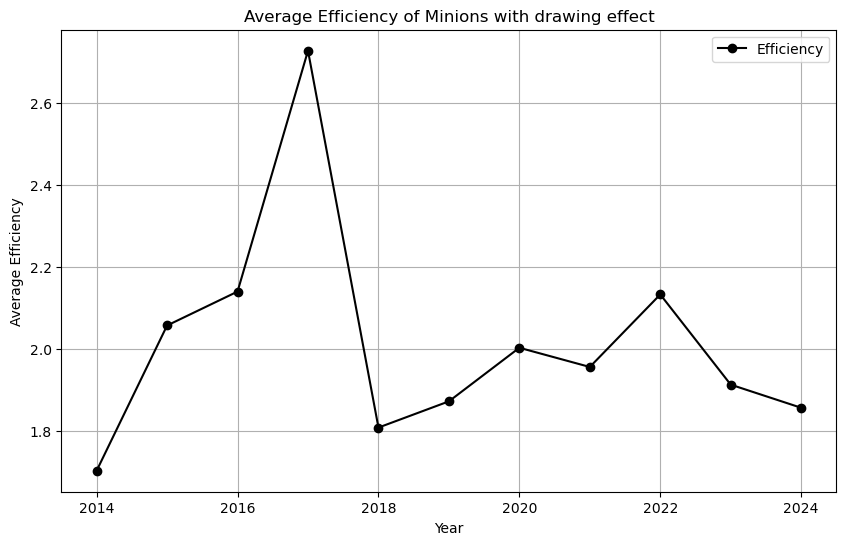

In [38]:
import matplotlib.pyplot as plt

# Group the drawers dataframe by 'set' (or 'year') and calculate the mean efficiency
drawers_efficiency_over_time = drawers.groupby('set')['efficiency'].mean()

# Plotting the line graph
plt.figure(figsize=(10,6))
plt.plot(drawers_efficiency_over_time.index, drawers_efficiency_over_time.values, label='Efficiency', color='black', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Efficiency')
plt.title('Average Efficiency of Minions with drawing effect')

# Add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [36]:
drawers.loc[(drawers['efficiency'] > 2) & (drawers['set']==2017)]

,name,rarity,cost,attack,health,text,mechanics,set,efficiency
3513,Coldwraith,common,3.0,3.0,4.0,<b>Battlecry:</b> If an enemy is <b>Frozen</b>...,[BATTLECRY],2017,2.33
3728,Kobold Librarian,common,1.0,2.0,1.0,<b>Battlecry:</b> Draw a card. Deal 2 damage t...,[BATTLECRY],2017,3.00
3850,The Darkness,legendary,4.0,20.0,20.0,[x]Starts <b>Dormant</b>.\n<b>Battlecry:</b> S...,[BATTLECRY],2017,10.00
5526,Arcanologist,common,2.0,2.0,3.0,<b>Battlecry:</b> Draw a <b>Secret</b>.,[BATTLECRY],2017,2.50
5572,Bright-Eyed Scout,epic,3.0,3.0,4.0,<b>Battlecry:</b> Draw a card. Change its Cost...,[BATTLECRY],2017,2.33


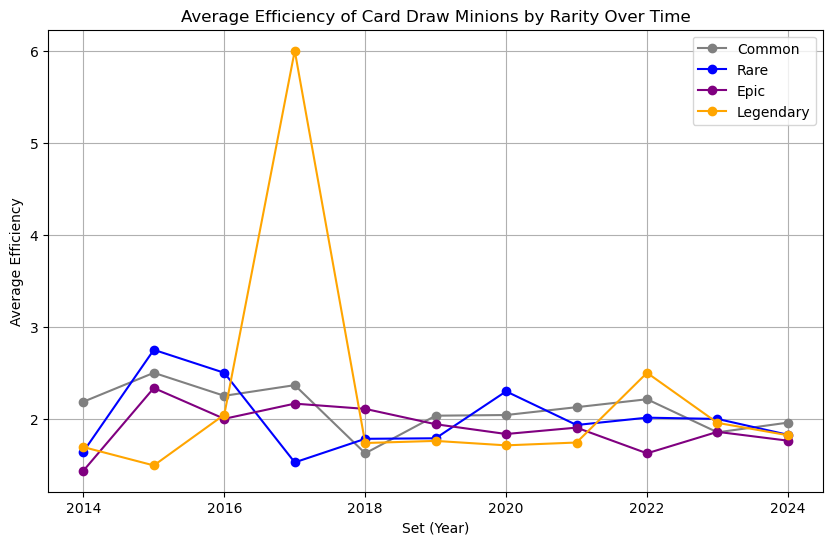

In [37]:
import matplotlib.pyplot as plt

# Group the drawers dataframe by 'set' and 'rarity' and calculate the mean efficiency for each group
drawers_efficiency_by_rarity = drawers.groupby(['set', 'rarity'])['efficiency'].mean().unstack()

# Plotting the line graph
plt.figure(figsize=(10,6))

# Plot each rarity as a separate line
plt.plot(drawers_efficiency_by_rarity.index, drawers_efficiency_by_rarity['common'], label='Common', color='grey', marker='o')
plt.plot(drawers_efficiency_by_rarity.index, drawers_efficiency_by_rarity['rare'], label='Rare', color='blue', marker='o')
plt.plot(drawers_efficiency_by_rarity.index, drawers_efficiency_by_rarity['epic'], label='Epic', color='purple', marker='o')
plt.plot(drawers_efficiency_by_rarity.index, drawers_efficiency_by_rarity['legendary'], label='Legendary', color='orange', marker='o')

# Add labels and title
plt.xlabel('Set (Year)')
plt.ylabel('Average Efficiency')
plt.title('Average Efficiency of Card Draw Minions by Rarity Over Time')

# Add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

In [40]:
data

,name,rarity,cost,attack,health,text,mechanics,set,efficiency
2,Fallen Hero,rare,2.0,3.0,2.0,Your Hero Power deals 1 extra damage.,[HEROPOWER_DAMAGE],2015,2.50
5,Dalaran Aspirant,common,4.0,3.0,5.0,<b>Spell Damage +1</b>\n<b>Inspire:</b> Gain <...,[INSPIRE],2015,2.00
6,Spellslinger,common,3.0,3.0,4.0,<b>Battlecry:</b> Both players\nget a random s...,[BATTLECRY],2015,2.33
7,Coldarra Drake,epic,6.0,6.0,7.0,You can use your Hero Power any number of times.,NaN,2015,2.17
8,Rhonin,legendary,8.0,7.0,7.0,<b>Deathrattle:</b> Add 3 copies of Arcane Mis...,[DEATHRATTLE],2015,1.75
...,...,...,...,...,...,...,...,...,...
6647,Felfire Deadeye,common,2.0,2.0,3.0,Your Hero Power costs (1) less.,[AURA],2020,2.50
6648,Crabrider,common,2.0,1.0,4.0,<b><b>Rush</b>\nWindfury</b>,"[RUSH, WINDFURY]",2020,2.50
6649,Armor Vendor,rare,1.0,1.0,3.0,<b>Battlecry:</b> Give 4 Armor to each hero.,[BATTLECRY],2020,4.00
6651,Runaway Blackwing,rare,9.0,9.0,9.0,"[x]At the end of your turn,\ndeal 9 damage to ...",[TRIGGER_VISUAL],2020,2.00
